# Linear and Quadratic Discriminant Analysis

## Model Specification

LDA/QDA models the density of $p(x|y)$ by a multivariate Gaussian:

\begin{align}
P(X=x|G=k) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_k)^{\top}\Sigma_k^{-1}(x-\mu_k)\right)
\end{align}

LDA further assumes $\Sigma_k=\Sigma$, which leads to the **linear discriminant function**:
\begin{align}
\delta_k(x) = x^{\top}\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^{\top}\Sigma^{-1}\mu_k + \log\pi_k,
\end{align}

where $\pi_k$ is the (prior) class probabilities, which can be fiddled to deal with class imbalance. The decision boundary between each pair of classes $k$ and $l$ is described by the equation $\{x: \delta_k(x) = \delta_l(x)\}$ and it is linear in $x$. There are simple closed-form estimation of the parameters:
\begin{align}
&\hat{\pi}_k = N_k/N,\;\;\text{where $N_k$ is the number of class-$k$ observations}\\
&\hat{\mu}_k = \sum_{g_i=k}x_i/N_k\\
&\hat{\Sigma}= \sum_{k=1}^K\sum_{g_i=k}(x_i-\hat{\mu}_k)(x_i-\hat{\mu}_k)^{\top}/(N-K)
\end{align}

There is another geometric reformulation of LDA. Since in LDA we assume that all classes have the same estimated covariance $\Sigma$, we can rescale the data so that this covariance is the identity:

\begin{align}
X^* = D^{-1/2}U^t X\text{ with }\Sigma = UDU^t
\end{align}

Then one can show that to classify a data point after scaling is equivalent to finding the estimated class mean $\mu^*_k$ which is closest to the data point in the Euclidean distance. But this can be done just as well after projecting on the K-1 affine subspace $H_K$ generated by all the $\mu^*_k$ for all classes. This also explains why `svd` can be used as a computing alternative in `sklearn`; see below.

QDA, on the other hand, does not impose any restriction on the variance matrix $\Sigma$ and as a result it does not get cancelled out in calculating the discriminant function: it is quadratic in $x$:

\begin{align}
\delta_k(x) = -\frac{1}{2}\log|\Sigma_k| - \frac{1}{2}(x-\mu_k)^{\top}\Sigma_k^{-1}(x-\mu_k)+\log\pi_k.
\end{align}

As such, the decision boundary is also quadratic in $x$. The estimation problem for QDA is similar to LDA, except that separate covariance matrices must be estimated for each class. When $p$ is large, it can be a burden computationally or even leads to singular matrix (something that regularized discriminant analysis detailed below is trying to address). Another way to **produce quadratic boundary is to use LDA in the enlarged five-dimensional quadratic polynomial space** - it is found that the difference between this alternative and full QDA is small empirically.

### Variants and Generalizations

**Regularized Discriminant Analysis**

As mentioned above, compared to LDA, QDA suffers from the fact that number of parameters will explode when $p$ is large, which poses problems in estimating $\Sigma_k$. One approach to alleviate this problem is restricting ourselves to diagonal matrices. A more systematic approach is via shrinkage.

- As a compromise between LDA and QDA, the most straightforward way is
\begin{align}
\hat{\Sigma}_k(\alpha) = \alpha\hat{\Sigma}_k + (1-\alpha)\hat{\Sigma}
\end{align}

- One can also shrink $\hat{\Sigma}$ itself, which can be used in LDA:
\begin{align}
\hat{\Sigma}(\gamma) = \gamma\hat{\Sigma} + (1-\gamma)\hat{\sigma}^2\bf{I}.
\end{align}

    This is also the Ledoit-Wolf type shrinkage that is implemented in `sklearn`.

## Theoretical Properties

### Advantages

- LDA and QDA are attractive because they have closed-form solutions that can be easily computed.
- LDA and QDA are inherently multi-class
- LDA and QDA have no hyperparameters to tune.
- When $p(x|y)$ is indeed Gaussian with shared $\Sigma$, LDA is asymptotically efficient. This can be better understood in the comparison of LDA vs. logistic regression in the [logistic regression notebook](logistic_regression.ipynb).

### Disadvantages

### Relation to Other Models

**Comparison to logistic regression**

For LDA's relation to logistic regression, see the notebook on [logistic regression](logistic_regression.ipynb).

**The generative models**

LDA and [Naive Bayes]() all belong to a class of model called **generative models**, which models the posterior probability of $p(x|y)$. Most generally, suppose $f_k(x)$ is the posterior, class-conditional density of $X$ given the class is $G=k$ and let $\pi_k$ be the prior probability of class $k$ with $\sum_{k=1}^K\pi_k=1$. Then Bayes' Theorem yields

\begin{align}
P(G=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^Kf_l(x)\pi_l},
\end{align}

and $P(G=k|X=x)$ can be modeled by modeling $f_k$.

- Linear and quadratic discriminant analysis use Gaussian density for $f_k$.
- Naive Bayes models, with the so-called Naive Bayes assumption, takes $f_k$ just as the product of marginal densities, i.e. all $X$ are independent.
- More complex densities, such as mixture of Gaussian, or even those fit by nonparametric density estimates (e.g. as in [kernel density estimation](kernel density estimate.ipynb)) can generate non-linear decision boundaries.

**Comparison with SVM**

SVM without kernels also produces linear boundaries as logistic regression and LDA. Again the difference is how the linear boundaries are determined.

- For SVM, the linear boundary is determined only by the support vectors, i.e. the points that lie in the margin or wrong side of the boundary. As such, non-support-vector points can even be delected without affecting the boundary. 

- To the contrary, for LDA, even points deep inside the boundary determines the boundary, since they are part of the covariance estimation of the class Gaussian.

## Empirical Performance

### Advantages

- Both LDA and QDA are found to perform well on an amazingly large and diverse set of classification tasks. The reason is not likely to be that Gaussian assumption or even homogenous covariance matrix is true in practice, but of that of a bias-variance tradeoff - we can put up with the bias of a linear decision boundary because it can be estimated with much lower variance than mor exotic alternatives.

### Disadvantages

## Implementation Details and Practical Tricks

**`discriminant_analysis` in `sklearn`**

In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False)
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

[1]


**Selected Parameters**

- `solver`:

    Solver to use, possible values:
    - `'svd'`: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
    - `'lsqr'`: Least squares solution, can be combined with shrinkage.
    - `'eigen'`: Eigenvalue decomposition, can be combined with shrinkage.


- `shrinkage`:

    Shrinkage parameter, possible values:
    - `None`: no shrinkage (default).
    - `'auto'`: automatic shrinkage using the Ledoit-Wolf lemma.
    - float between 0 and 1: fixed shrinkage parameter.
    Note that shrinkage works only with `'lsqr'` and `'eigen'` solvers.


- `priors`: shape `(n_classes,)`

    Class priors.


- `n_components`:

    Number of components `(< n_classes - 1)` for dimensionality reduction.


- `store_covariance`:

    Additionally compute class covariance matrix (default False), used only in ‘svd’ solver.

**Selected Attributes**

- `coef_`: shape `(n_features,)` or `(n_classes, n_features)`

    Weight vector(s).
    

- `intercept_`: shape `(n_features,)`

    Intercept term.
    

- `covariance_`: shape `(n_features, n_features)`

    Covariance matrix (shared by all classes).
    

- `explained_variance_ratio_`: shape `(n_components,)`

    Percentage of variance explained by each of the selected components. If `n_components` is not set then all components are stored and the sum of explained variances is equal to 1.0. Only available when `eigen` or `svd` solver is used.


- `means_`: shape `(n_classes, n_features)`

    Class means.

**Dimension reduction using `discriminant_analysis.LinearDiscriminantAnalysis.transform`**

## Use Cases

**Reduced-Rank Linear Discriminant Analysis**

Besides for classification, LDA can also be used to perform dimension reduction. The geometric reformulation in the above shows that, implicit in the LDA classifier, there is a dimensionality reduction by linear projection onto a $K-1$ dimensional space. If $K=3$, for instance, this could allow us to view the data in a two-dimensional plot, color-coded for classes - hence also a visualization tool.

We can reduce the dimension even more, to a chosen $L$, by projecting onto the linear subspace $H_L$ which maximize the variance of the $\mu^*_k$ after projection - in effect, we are doing a form of PCA for the transformed class means $\mu^*_k$. The process is related to Fisher's discriminant analysis: find a linear combination $Z=a^{\top}X$ such that the between-class variance is maximized relative to the within-class variance. In the example immediately following, the components are visualized. And in the example further below, it provides intuition on how the covariance affect the choice of the direction.

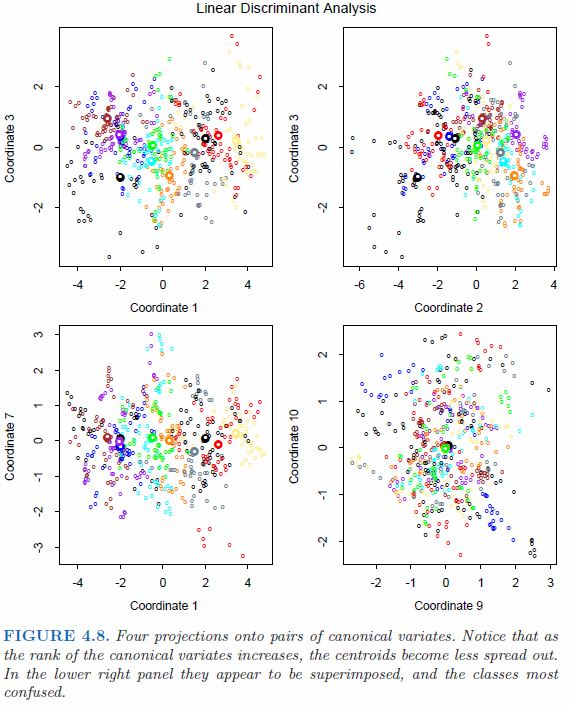

In [1]:
from IPython.display import Image
import os.path
path = r"C:\Users\Yixian\Documents\machine-learning"
file = "discriminant_analysis.JPG"
Image(filename = os.path.join(path, file))

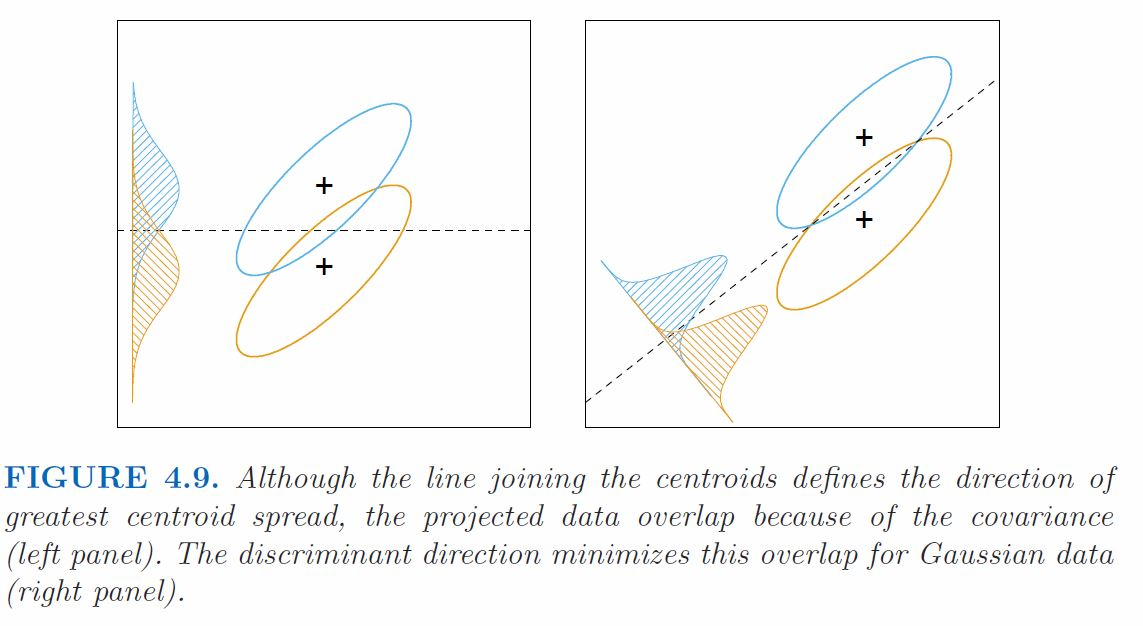

In [2]:
file = "LDA_dimension_reduction.JPG"
Image(filename = os.path.join(path, file))

## Results Interpretation, Metrics and Visualization

The following is an example of LDA performing classifications on multiple classes. Notice the decision boundaries are not the perpendicular bisectors of the line segments joining the centroids. This would be the case if the covariance $\Sigma$ were spherical $\sigma^2\bf{I}$.

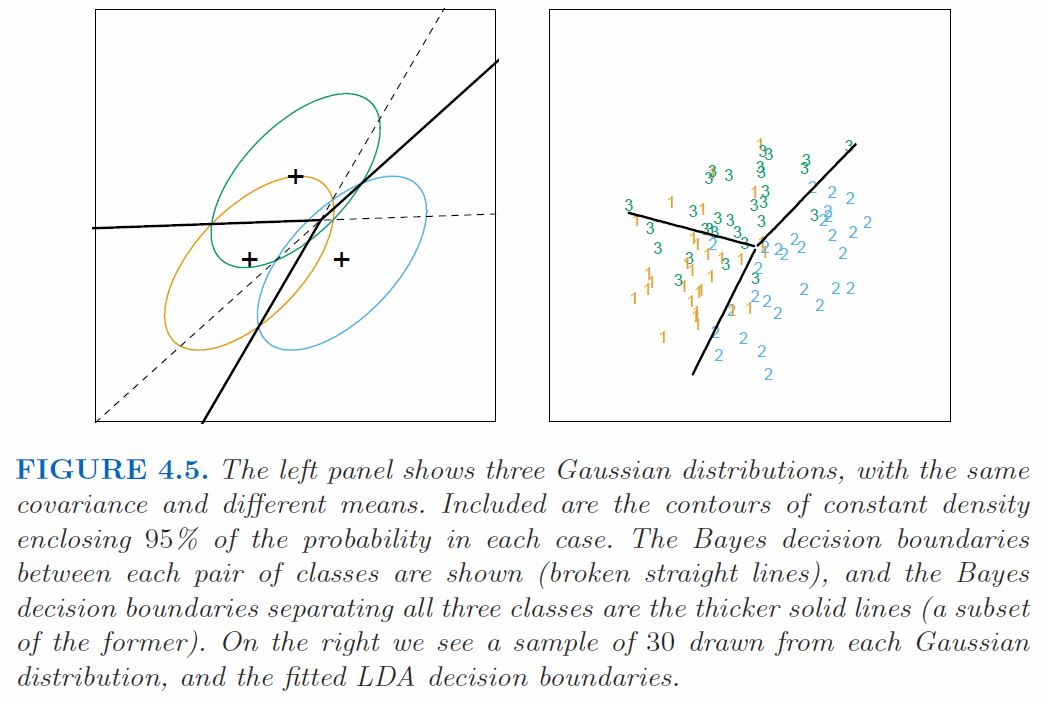

In [1]:
file = "LDA.JPG"
Image(filename = os.path.join(path, file))

## References

- Andrew Ng's cs229 2011 Lecture Notes
- ESL Chapter 4.3
- [`sklearn` Document 1.2](http://scikit-learn.org/stable/modules/lda_qda.html)

### Further Reading

## Misc.